In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
import shap
shap.initjs()
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

from sklearn.preprocessing import OneHotEncoder

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
data = pd.read_csv("PerfectData.csv")
data= data.rename(columns={"MORPH_ICD10_O2":"Morph","BEHAVIOUR_ICD10_O2":"Behaviour","T_BEST": "T Best",
                          "N_BEST" : "N Best", "M_BEST" : "M Best", "GRADE" : "Grade", "AGE" : "Age",
                          "SEX":"Sex","CANCERCAREPLANINTENT":"Cancer Plan", "NEWVITALSTATUS" : "Vital Status",
                          "HEIGHT_AT_START_OF_REGIMEN":"Height","WEIGHT_AT_START_OF_REGIMEN":"Weight","MAPPED_REGIMEN":"Regimen","CLINICAL_TRIAL":"Clinical Trial",
                          "CHEMO_RADIATION":"Chemo Radiation","REGIMEN_MOD_TIME_DELAY":"Regimen Time Delay","REGIMEN_MOD_STOPPED_EARLY":"Regimen Stopped Early",
                          "REGIMEN_OUTCOME_SUMMARY":"Outcome","CYCLE_NUMBER":"Cycle","ACTUAL_DOSE_PER_ADMINISTRATION":"Dose Administration",
                           "ADMINISTRATION_ROUTE":"Administration Route", "DRUG_GROUP":"Drug Group","ACE27":"ACE"})


In [3]:
data = data.rename(columns={"Vital Status":"Alive"})
data = data.drop(["Alive"], axis = 1)
cat_vars = data.columns.tolist()
cat_vars.remove("Height")
cat_vars.remove("Weight")
cat_vars.remove("Morph")
cat_vars.remove("Age")
cat_vars.remove("Cycle")
cat_vars.remove("Dose Administration")
cat_vars.remove("diff")
cat_vars

['Behaviour',
 'T Best',
 'N Best',
 'M Best',
 'Grade',
 'Sex',
 'Cancer Plan',
 'CNS',
 'ACE',
 'Regimen',
 'Clinical Trial',
 'Chemo Radiation',
 'Regimen Time Delay',
 'Regimen Stopped Early',
 'Outcome',
 'Administration Route',
 'Drug Group']

In [4]:
num_vars = ["diff","Height","Weight","Morph","Age","Cycle","Dose Administration"]

In [5]:
test_data = data.copy()

for var in cat_vars:
    print(test_data[var].nunique())
    test_data[var] = test_data[var].astype('category')
    test_data[var] = test_data[var].cat.codes
    test_data[var] = test_data[var].astype("int")
test_data

1
8
4
4
5
2
4
6
5
36
3
2
2
2
6
5
33


,Morph,Behaviour,T Best,N Best,M Best,Grade,Age,Sex,Cancer Plan,CNS,...,Clinical Trial,Chemo Radiation,Regimen Time Delay,Regimen Stopped Early,Outcome,Cycle,Dose Administration,Administration Route,Drug Group,diff
0,8140.0,0,7,2,3,4,59,0,1,3,...,0,0,1,0,0,1,200.0,0,12,70
1,8140.0,0,7,2,3,4,59,0,1,3,...,0,0,1,0,0,1,10.0,1,22,70
2,8140.0,0,4,0,0,2,54,1,0,3,...,0,0,0,0,0,1,130.0,0,12,165
3,8140.0,0,4,0,0,2,54,1,0,3,...,0,0,0,0,0,1,210.0,0,12,165
4,8140.0,0,4,0,0,2,54,1,0,3,...,0,0,0,0,0,2,10.0,1,22,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,9861.0,0,1,0,0,4,75,1,2,0,...,0,0,0,0,0,4,240.0,0,28,191
946,9861.0,0,1,0,0,4,75,1,2,0,...,0,0,0,0,0,4,8.0,0,28,191
947,9861.0,0,1,0,0,4,75,1,2,0,...,0,0,0,0,0,4,120.0,0,9,191
948,9861.0,0,1,0,0,4,75,1,2,0,...,0,0,0,0,0,3,950.0,0,3,191


In [6]:
Ytrain = test_data[["diff"]]
Xtrain = test_data.drop(columns=["diff"])
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.3, random_state = 30)

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler


def MLPPredict(X_train, Y_train):
    scaler = StandardScaler()
    X_scaled_train = scaler.fit_transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    reg = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes=(64,100,64),activation="relu" ,random_state=1, max_iter=20000).fit(X_scaled_train, Y_train.values.ravel())
    pred=reg.predict(X_scaled_test)
    
    rmse = np.sqrt(MSE(Y_test, pred))
    print("RMSE : % f" %(rmse))
    print(r2_score(Y_test, pred))
    
    return X_scaled_train, X_scaled_test, reg

In [8]:
X_scaled_train, X_scaled_test, reg = MLPPredict(X_train,Y_train)

RMSE :  132.076783
0.9628198089546227


# Ordinal Encoding Test 1

In [9]:
X_train_summary = shap.kmeans(X_scaled_train, 10)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(reg.predict, X_train_summary)
shap_values = explainer.shap_values(X_scaled_test)

  0%|          | 0/285 [00:00<?, ?it/s]

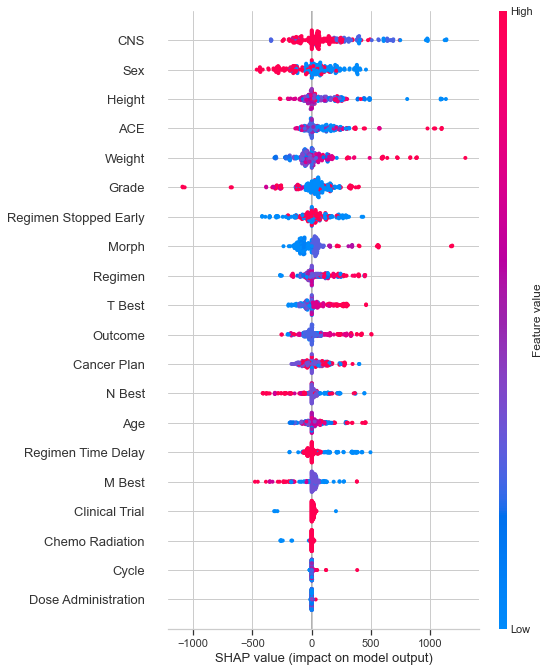

In [17]:
shap.summary_plot(shap_values, X_scaled_test, X_train.columns)

In [26]:
print(shap_values)

[[ 483.37097072    0.            0.         ...    0.
     0.            0.        ]
 [  20.26023908    0.           65.90333645 ...    0.
     0.            0.        ]
 [ -69.91553144    0.          119.72912164 ...    0.
     0.            0.        ]
 ...
 [   0.            0.         -325.25732092 ...    0.
   -20.06881594    0.        ]
 [  44.32504693    0.           15.31242733 ...    0.
     0.            0.        ]
 [ -36.64249746    0.          246.73312106 ...    0.
     0.            0.        ]]


# Ordinal Encoding Test 2

In [11]:
test_data = data.copy()
for var in cat_vars:
    test_data[var] = test_data[var].astype('category')
    test_data[var] = test_data[var].cat.codes
    test_data[var] = test_data[var].astype("int")

    
for index, row in test_data.iterrows():
    for var in cat_vars:
        if test_data[var].nunique() == 1:
            continue
        if test_data.at[index, var] == (test_data[var].nunique()-1):
            test_data.at[index, var] = 0
        else:
            test_data.at[index, var] += 1

test_data

,Morph,Behaviour,T Best,N Best,M Best,Grade,Age,Sex,Cancer Plan,CNS,...,Clinical Trial,Chemo Radiation,Regimen Time Delay,Regimen Stopped Early,Outcome,Cycle,Dose Administration,Administration Route,Drug Group,diff
0,8140.0,0,0,3,0,0,59,1,2,4,...,1,1,0,1,1,1,200.0,1,13,70
1,8140.0,0,0,3,0,0,59,1,2,4,...,1,1,0,1,1,1,10.0,2,23,70
2,8140.0,0,5,1,1,3,54,0,1,4,...,1,1,1,1,1,1,130.0,1,13,165
3,8140.0,0,5,1,1,3,54,0,1,4,...,1,1,1,1,1,1,210.0,1,13,165
4,8140.0,0,5,1,1,3,54,0,1,4,...,1,1,1,1,1,2,10.0,2,23,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,9861.0,0,2,1,1,5,75,0,3,1,...,1,1,1,1,1,4,240.0,1,29,191
946,9861.0,0,2,1,1,5,75,0,3,1,...,1,1,1,1,1,4,8.0,1,29,191
947,9861.0,0,2,1,1,5,75,0,3,1,...,1,1,1,1,1,4,120.0,1,10,191
948,9861.0,0,2,1,1,5,75,0,3,1,...,1,1,1,1,1,3,950.0,1,4,191


In [12]:
Ytrain = test_data[["diff"]]
Xtrain = test_data.drop(columns=["diff"])
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.3, random_state = 30)
X_scaled_train, X_scaled_test, reg = MLPPredict(X_train,Y_train)


RMSE :  186.835815
0.9255989765440241


In [14]:
X_train_summary = shap.kmeans(X_scaled_train, 10)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(reg.predict, X_train_summary)
shap_values = explainer.shap_values(X_scaled_test)

  0%|          | 0/285 [00:00<?, ?it/s]

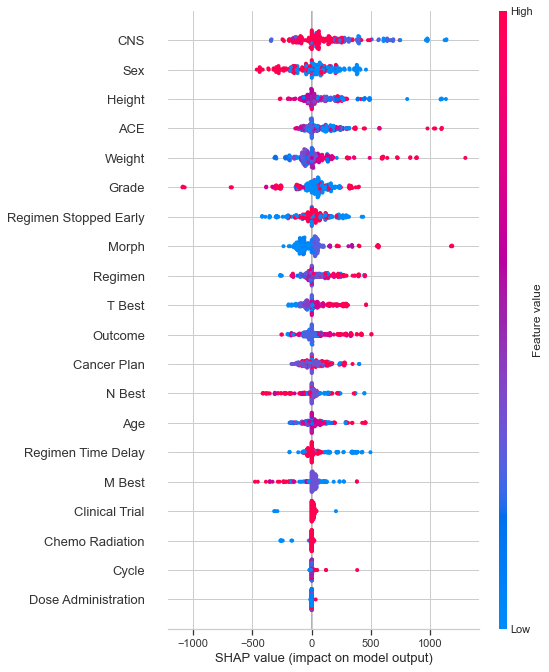

In [16]:
shap.summary_plot(shap_values, X_scaled_test, X_train.columns)

# Ordinal Encoding Test 3

In [18]:
for index, row in test_data.iterrows():
    for var in cat_vars:
        if test_data[var].nunique() == 1:
            continue
        if test_data.at[index, var] == (test_data[var].nunique()-1):
            test_data.at[index, var] = 0
        else:
            test_data.at[index, var] += 1

In [19]:
test_data

,Morph,Behaviour,T Best,N Best,M Best,Grade,Age,Sex,Cancer Plan,CNS,...,Clinical Trial,Chemo Radiation,Regimen Time Delay,Regimen Stopped Early,Outcome,Cycle,Dose Administration,Administration Route,Drug Group,diff
0,8140.0,0,1,0,1,1,59,0,3,5,...,2,0,1,0,2,1,200.0,2,14,70
1,8140.0,0,1,0,1,1,59,0,3,5,...,2,0,1,0,2,1,10.0,3,24,70
2,8140.0,0,6,2,2,4,54,1,2,5,...,2,0,0,0,2,1,130.0,2,14,165
3,8140.0,0,6,2,2,4,54,1,2,5,...,2,0,0,0,2,1,210.0,2,14,165
4,8140.0,0,6,2,2,4,54,1,2,5,...,2,0,0,0,2,2,10.0,3,24,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,9861.0,0,3,2,2,6,75,1,0,2,...,2,0,0,0,2,4,240.0,2,30,191
946,9861.0,0,3,2,2,6,75,1,0,2,...,2,0,0,0,2,4,8.0,2,30,191
947,9861.0,0,3,2,2,6,75,1,0,2,...,2,0,0,0,2,4,120.0,2,11,191
948,9861.0,0,3,2,2,6,75,1,0,2,...,2,0,0,0,2,3,950.0,2,5,191


In [23]:
Ytrain = test_data[["diff"]]
Xtrain = test_data.drop(columns=["diff"])
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.3, random_state = 30)
X_scaled_train, X_scaled_test, reg = MLPPredict(X_train,Y_train)

RMSE :  184.863935
0.9271611577748622


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


In [21]:
X_train_summary = shap.kmeans(X_scaled_train, 10)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(reg.predict, X_train_summary)
shap_values = explainer.shap_values(X_scaled_test)

  0%|          | 0/285 [00:00<?, ?it/s]

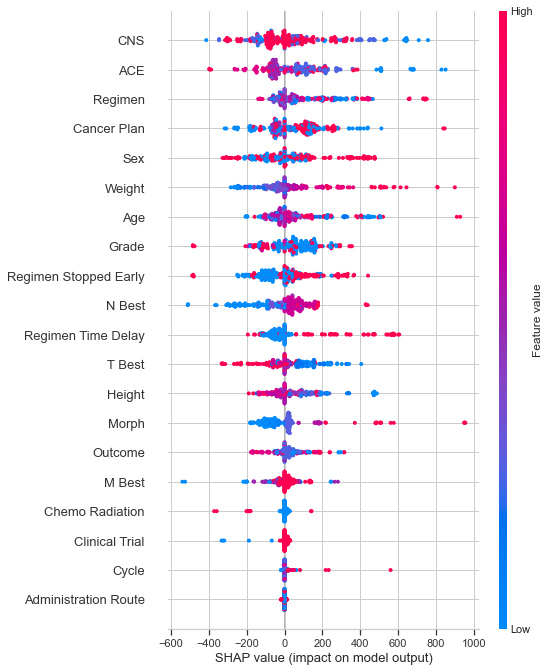

In [25]:
shap.summary_plot(shap_values, X_scaled_test, X_train.columns)